In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [3]:
user_data = pd.read_csv('../../user_features.csv', index_col = 0)


In [4]:
user_data_top = user_data[user_data['num_businesses'] > 30]
low_variance_feats = []
for feat in user_data_top.columns:
    # print(f'{feat}:\t {user_data_top[feat].mean()} \t {user_data_top[feat].std()}')
    if user_data_top[feat].std() < 0.1:
        low_variance_feats.append(feat)

In [82]:
len(low_variance_feats)

59

In [7]:
user_top_hivar = user_data_top.drop(low_variance_feats, axis = 1)

In [89]:
corr_matrix = user_top_hivar.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [90]:
len(to_drop)

9

In [91]:
for feature in to_drop: 
    print(feature +' , ' +upper[feature].idxmax())
    print(upper[feature].max())

Caterers , Barbeque
0.9595260227263585
Chicken Wings , Barbeque
0.9606372768954673
Delis , Caterers
0.9606000981198175
Desserts , Bakeries
0.9557688111458111
Diners , Delis
0.9604382997210662
Specialty Food , Delis
0.953872685401627
Sports Bars , Chicken Wings
0.964133758238003
Sushi Bars , Japanese
0.9816192065635495
RestaurantsCounterService , Diners
0.9798933339457342


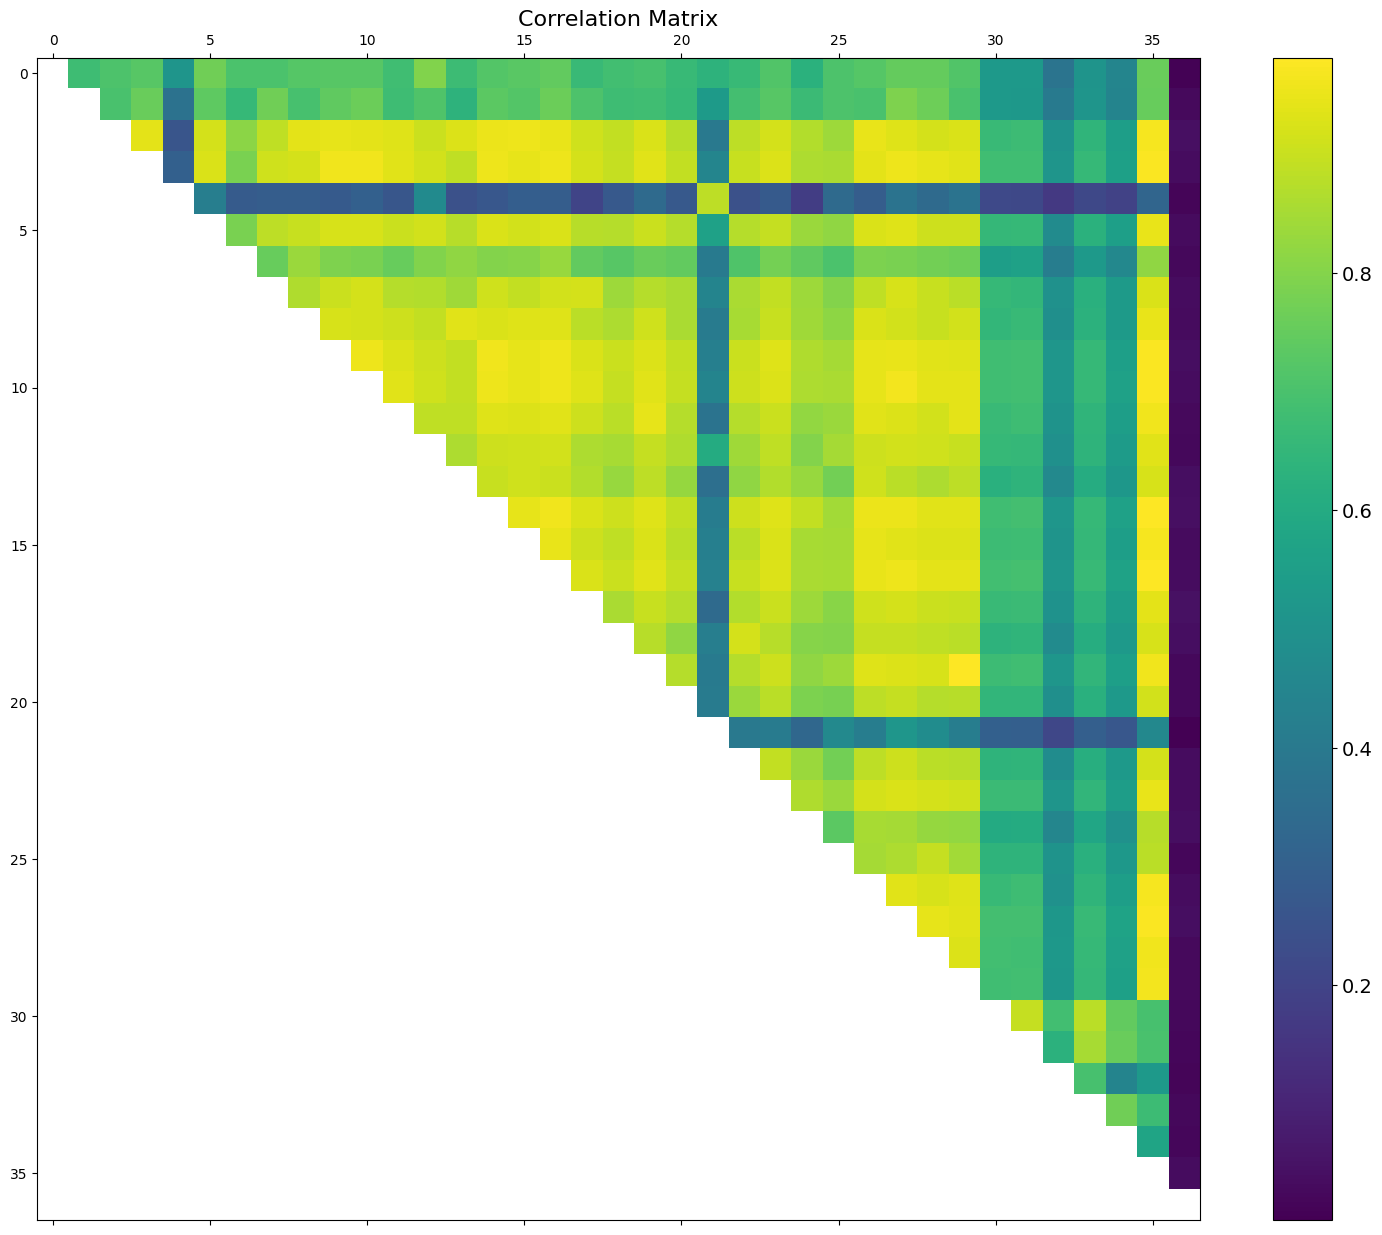

In [146]:
f = plt.figure(figsize=(19, 15))
plt.matshow(upper, fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [145]:
upper

,American (New),American (Traditional),Bakeries,Barbeque,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,Sports Bars,Steakhouses,Sushi Bars,BusinessAcceptsCreditCards,RestaurantsTakeOut,Alcohol,RestaurantsAttire,GoodForKids,RestaurantsCounterService,num_businesses
American (New),NaN,0.676782,0.709810,0.726076,0.514002,0.769761,0.705490,0.705425,0.723413,0.727941,...,0.749834,0.750954,0.713788,0.532942,0.530520,0.378210,0.509479,0.449352,0.756167,0.008583
American (Traditional),NaN,NaN,0.700637,0.758898,0.370244,0.738387,0.658474,0.768504,0.696917,0.744027,...,0.790975,0.765599,0.698923,0.530362,0.524938,0.404034,0.514021,0.444511,0.755682,0.026739
Bakeries,NaN,NaN,NaN,0.942447,0.258577,0.918673,0.812788,0.886835,0.940815,0.946497,...,0.935619,0.920189,0.927267,0.667706,0.674565,0.502905,0.644771,0.550837,0.969658,0.042584
Barbeque,NaN,NaN,NaN,NaN,0.301174,0.926795,0.783504,0.912319,0.919502,0.959526,...,0.955629,0.943995,0.938975,0.680371,0.682542,0.513714,0.657381,0.557175,0.976862,0.032619
Bars,NaN,NaN,NaN,NaN,NaN,0.419397,0.282347,0.290748,0.290699,0.278028,...,0.374540,0.342024,0.374072,0.219605,0.214777,0.163307,0.213176,0.195094,0.322132,0.013546
Beer,NaN,NaN,NaN,NaN,NaN,NaN,0.783554,0.885228,0.900194,0.921594,...,0.933217,0.906676,0.908591,0.653844,0.659346,0.475129,0.627701,0.554093,0.949641,0.030370
Breakfast & Brunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752636,0.836192,0.791719,...,0.783284,0.772997,0.765714,0.552112,0.563473,0.417154,0.533396,0.457651,0.817763,0.022088
Burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864156,0.905041,...,0.922306,0.898371,0.880079,0.658453,0.651424,0.496112,0.624102,0.536428,0.927857,0.034062
Cafes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921628,...,0.914861,0.899989,0.913820,0.650882,0.660938,0.490944,0.631808,0.534203,0.949683,0.031938
Caterers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.949205,0.937901,0.934759,0.681536,0.683128,0.516184,0.656512,0.555934,0.974273,0.039574


## OPTICS

In [5]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np


In [17]:
clust = OPTICS(cluster_method = 'xi', min_samples=5, xi=0.01, min_cluster_size=30)

# Run the fit
clust.fit(user_top_hivar)
labels = clust.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 69
Estimated number of noise points: 7011


Estimated number of clusters: 1
Estimated number of noise points: 309


In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [33]:
# X = StandardScaler().fit_transform(user_data_top)

In [37]:
# user_top_standard = pd.DataFrame(X,columns = user_data_top.columns, index = user_data_top.index)

In [143]:
db = DBSCAN(eps=0.2, min_samples=30).fit(user_top_hivar.iloc[:,:10])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 9494


In [117]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [126]:
np.sum(db.labels_ == 5)

11